In [8]:
#step 3a
import pandas as pd
import json
import urllib.parse
import requests as rq
import base64
import geocoder
import pandas as pd
import geopandas as gpd
import osmnx as ox
import folium
from shapely.geometry import Point
from IPython.display import Image
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from libpysal.weights import Queen, Rook, KNN, DistanceBand, lag_spatial
import libpysal
import pysal as ps

city = "Barcelona, Barcelona, Spain"
location = geocoder.arcgis(city)
latitude = location.lat
longitude = location.lng

%matplotlib inline
ox.__version__

'1.4.0'

In [13]:
gdf = gpd.read_file(r'C:/WORK_IAAC/submissions/Data Science III/datascience_III_src/BCN_barrios_RE.shp')
gdf.to_crs(25831, inplace=True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_ANNEX    73 non-null     object  
 1   ANNEXDESCR  73 non-null     object  
 2   ID_TEMA     73 non-null     object  
 3   TEMA_DESCR  73 non-null     object  
 4   ID_CONJUNT  73 non-null     object  
 5   CONJ_DESCR  73 non-null     object  
 6   ID_SUBCONJ  73 non-null     object  
 7   SCONJ_DESC  73 non-null     object  
 8   ID_ELEMENT  73 non-null     object  
 9   ELEM_DESCR  73 non-null     object  
 10  NIVELL      73 non-null     object  
 11  NDESCR_CA   73 non-null     object  
 12  NDESCR_ES   73 non-null     object  
 13  NDESCR_EN   73 non-null     object  
 14  TERME       73 non-null     object  
 15  DISTRICTE   73 non-null     object  
 16  BARRI       73 non-null     int64   
 17  AEB         73 non-null     object  
 18  SEC_CENS    73 non-null     object  
 19  GR

In [14]:
w_queen = Queen.from_dataframe(gdf, geom_col="geometry", idVariable="BARRI")

In [15]:
w_queen_score = lag_spatial(w_queen, gdf['MeanPBA'])
gdf["MeanPBA_lag"] = w_queen_score
gdf.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_DESCR,HEX_COLOR7,AdvIn,MinPBA,MaxPBA,MedPBA,MeanPBA,AvePBA,geometry,MeanPBA_lag
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,NULL,#73A88F,536,1734.782609,14889.848485,4056.085686,4250.134944,4250.134944,"POLYGON ((430162.188 4581936.985, 430550.104 4...",24017.496556
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,NULL,#73A88F,339,2000.000000,12403.100775,5277.777778,5467.578342,5467.578342,"POLYGON ((431189.907 4581851.447, 431332.429 4...",22742.023341
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,NULL,#73A88F,103,2343.750000,9692.307692,5550.245098,5678.205885,5678.205885,"POLYGON ((432798.734 4582081.260, 432805.852 4...",17101.414352
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,NULL,#73A88F,335,1500.000000,14875.000000,5273.039216,5559.728620,5559.728620,"POLYGON ((431733.736 4582441.816, 431827.673 4...",33343.909411
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,NULL,#73A88F,150,2721.649485,9057.971014,4358.974359,4575.477115,4575.477115,"POLYGON ((431741.815 4582625.649, 431645.093 4...",21686.085988


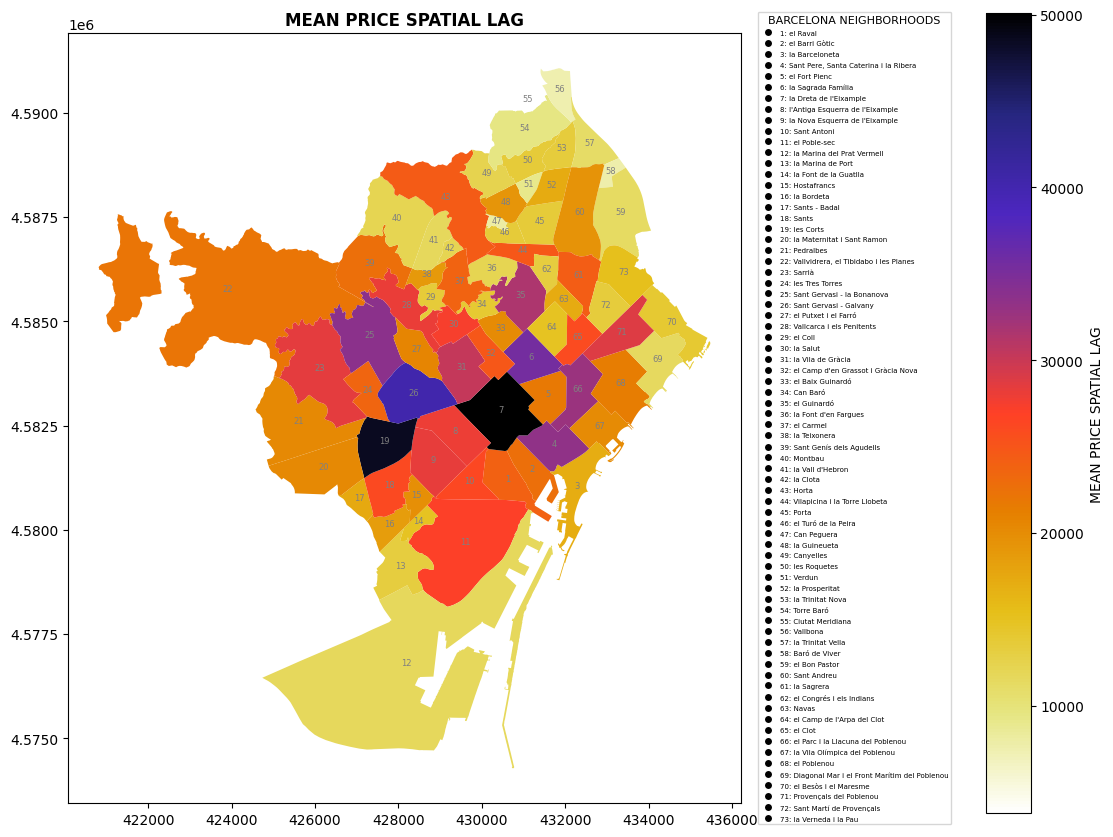

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
totcol = cm.CMRmap_r

# Plot gdfb with the "AdvIn" column
gdf.plot(column="MeanPBA_lag", cmap=totcol, ax=ax)

# Add names of 'BARRI' in the centers of polygons
for idx, row in gdf.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['BARRI'], ha='center', fontsize=6, color='gray')

# Create a colorbar
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=totcol)
sm.set_array(gdf['MeanPBA_lag'])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label("MEAN PRICE SPATIAL LAG")

# Create legend with two columns
handles, labels = [], []
for idx, row in gdf.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=totcol(1.0)))
    labels.append(f"{row['BARRI']}: {row['NOM']}")
    
num_columns = 1
legend = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), title='BARCELONA NEIGHBORHOODS', ncol=num_columns, fontsize=5, labelspacing=0.7)
legend.get_title().set_fontsize(8)

ax.set_title("MEAN PRICE SPATIAL LAG", fontsize=12, fontweight='bold')

plt.show()